In [35]:
from stardist.models import StarDist2D
from csbdeep.utils import normalize
import cv2 as cv

import os
import re
import csv

StarDist2D.from_pretrained()

model = StarDist2D.from_pretrained('2D_versatile_he')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [7]:
def get_image_mask_pairs(subjects, rgb_path, mask_path):
    '''
    Match images with labels in the csv file.
    '''
    images = []
    masks = []
    for patient in subjects:
        for file in os.listdir(rgb_path):
            if re.match(patient[0], file):
                images.append(os.path.join(rgb_path, file))
                masks.append(os.path.join(mask_path, file))
    return images, masks

In [8]:
google_path = '.'
path = os.path.join(google_path, 'QC')
train_test_path = os.path.join(path, 'split')
mask_path = os.path.join(path, "mask")
rgb_path = os.path.join(path, "rgb")

# Load training and validation csv files
def load_subjects(csv_path):
    with open(csv_path, newline='') as f:
        reader = csv.reader(f)
        subjects = list(reader)
    return subjects[1:]

train_subjects = load_subjects(os.path.join(train_test_path, 'train_subjects.csv'))
val_subjects = load_subjects(os.path.join(train_test_path, 'validate_subjects.csv'))

train_images, train_masks = get_image_mask_pairs(train_subjects, rgb_path, mask_path)
val_images,   val_masks   = get_image_mask_pairs(val_subjects, rgb_path, mask_path)

In [38]:
from stardist.data import test_image_he_2d

img = test_image_he_2d()
img = normalize(img)
labels, _ = model.predict_instances(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22105263..1.0947368].


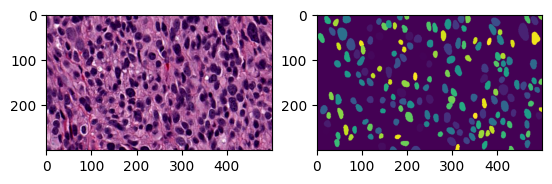

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(labels)

In [49]:
img = cv.imread(train_images[0])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = normalize(img)

mask = cv.imread(train_masks[0])[:,:,0]

labels, _ = model.predict_instances(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16666667..1.0539216].


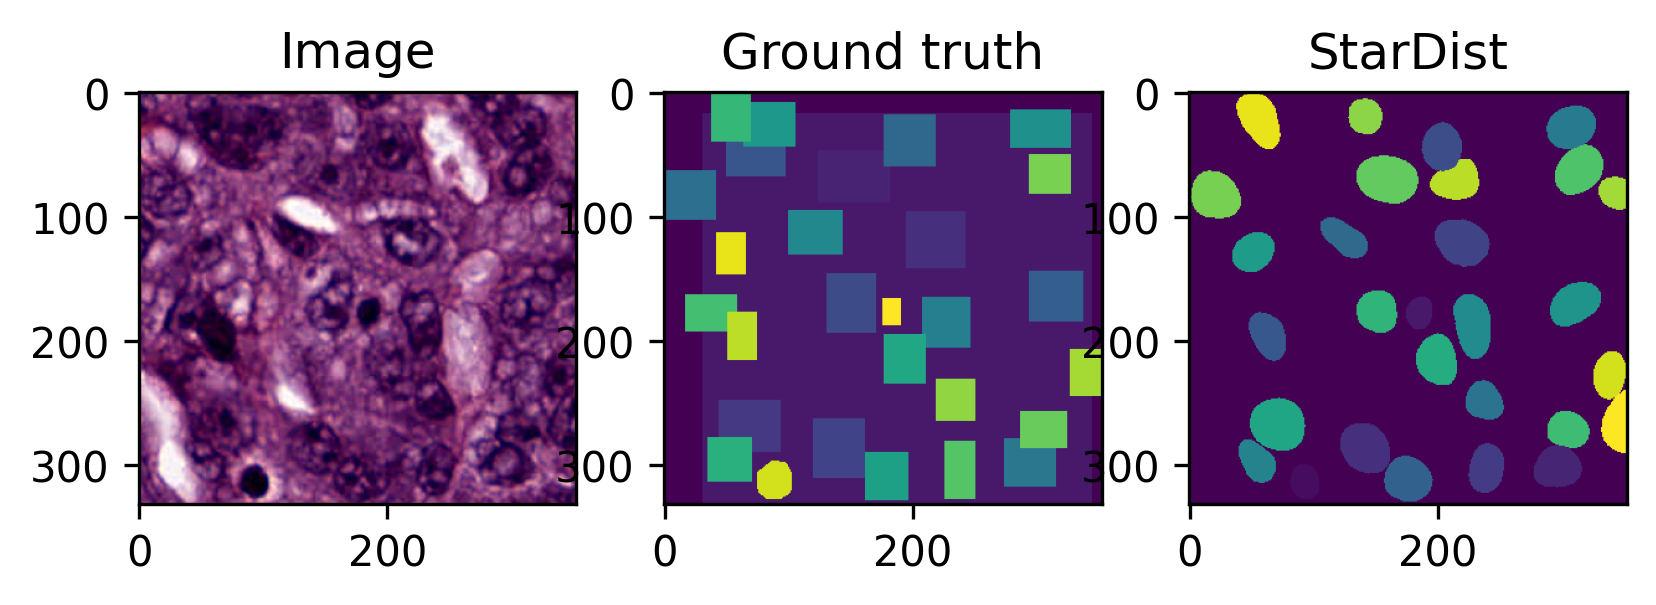

In [52]:
fig, ax = plt.subplots(1, 3)
fig.dpi = 300

ax[0].set_title("Image")
ax[0].imshow(img)

ax[1].set_title("Ground truth")
ax[1].imshow(mask)

ax[2].set_title("StarDist")
ax[2].imshow(labels)